In [6]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from src.nn_handler import NNHandler

## 1. Get training and validation datasets

In this case, the MNIST datasets will be used.

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

training_data = datasets.MNIST(root='./data', train=True, download=True,
                               transform=transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.1307,), (0.3081,))
                               ]))

test_data = datasets.MNIST(root='./data', train=False, download=True,
                           transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))
                           ]))

## 2. Load the model

`NNHandler` can automatically retrieve and load the architecture. No import is needed.

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NNHandler.load("models/test_model_code_5.pth", device)

In [9]:
print(model.model_code)

import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


This doesn't work since the model used to save the following one was defined in a jupyter notebook, so it can't be used outside of the scope of the jupyter notebook where it was defined.

In [10]:
# an error is expected here
print(NNHandler.load("models/model_state_epoch_5.pth", device).model_code)

AttributeError: Can't get attribute 'Net' on <module '__main__'>

## 5. Plot results

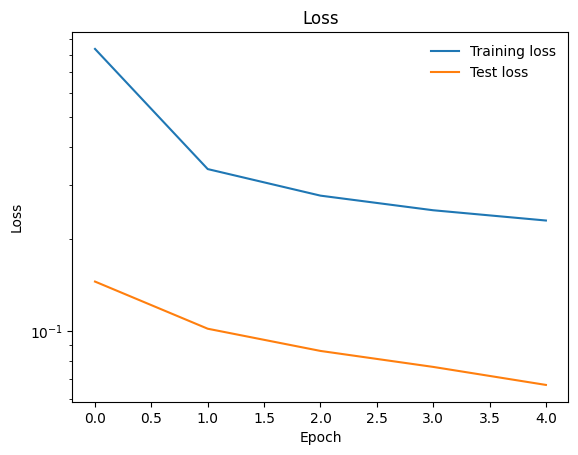

In [11]:
model.plot_losses(True)

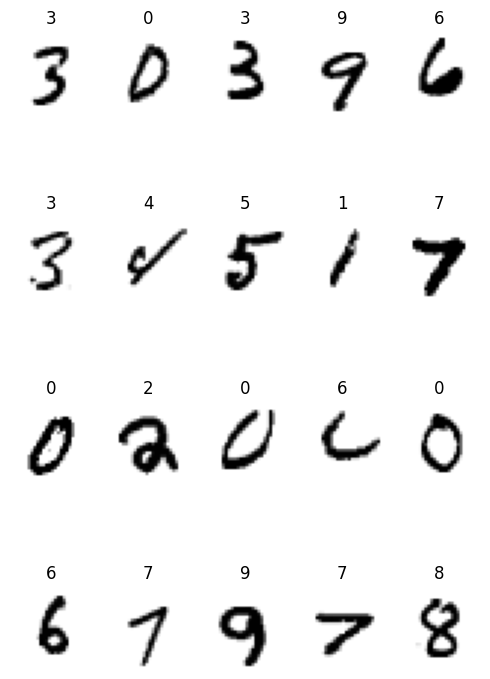

In [12]:
from matplotlib import pyplot as plt

# Plot n samples from the validation dataset with their predictions
n = 20
test_loader = torch.utils.data.DataLoader(test_data, batch_size=n, shuffle=True)
data_iter = iter(test_loader)
images, labels = data_iter.__next__()

# Get predictions
model.eval()
with torch.no_grad():
    images = images.to(device)
    outputs = model(images)

_, predicted = torch.max(outputs, 1)

plt.figure(figsize=(5, n // 5 * 2))
for index in range(n):
    plt.subplot(n // 5, 5, index + 1)
    plt.axis('off')
    plt.imshow(images[index].cpu().numpy().squeeze(), cmap='gray_r')
    plt.title('%i' % predicted[index])

plt.tight_layout()


# 6. Open notebook 'test/save_model_code_example_3.ipynb' for the continuation of the example.